# Decision Tree Classification
-----

<div class="table-of-contents" style="background-color:#433878; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
    <p><a class='anchor' id='top' style="color: #EEEEEE">Table of contents:</a></p>
  <ul>
    <li style="color: #493628"><a href="#1" style="color: #EEEEEE">Importing the libraries </a></li>
    <li style="color: #493628"><a href="#2" style="color: #EEEEEE">Importing the dataset</a></li>
    <li style="color: #493628"><a href="#3" style="color: #EEEEEE">Data analysis</a></li>
    <li style="color: #493628"><a href="#4" style="color: #EEEEEE">Split the dataset into dependent/independent variables</a></li>
    <li style="color: #493628"><a href="#5" style="color: #EEEEEE">Data Preprocessing</a></li>
    <li style="color: #493628"><a href="#6" style="color: #EEEEEE">Spliting the dataset into thetraining set and test set</a></li> 
    <li style="color: #493628"><a href="#7" style="color: #EEEEEE">Training the Decision Tree Classification model on training set</a></li>
    <li style="color: #493628"><a href="#8" style="color: #EEEEEE">Predicting The Test set results</a></li>  
    <li style="color: #493628"><a href="#9" style="color: #EEEEEE">Visualsing the Training set results</a></li>  
    <li style="color: #493628"><a href="#10" style="color: #EEEEEE">model evaluation</a></li>
    <li style="color: #493628"><a href="#11" style="color: #EEEEEE">Plotting the Confusion Matrix for Classification Results</a></li>    
    <li style="color: #493628"><a href="#12" style="color: #EEEEEE">Calculating and Printing the Accuracy Score</a></li>  
    <li style="color: #493628"><a href="#13" style="color: #EEEEEE">Sources</a></li>  
  </ul>
</div>


## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_csv("mushrooms.csv")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (8124, 23)
Number of rows: 8124
Number of columns: 23


In [5]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
dataset.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [8]:
dataset["class"].unique()

array(['p', 'e'], dtype=object)

## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [9]:
# To analyze descriptive statistics of data
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Step 4: <span id="4" style="color: #4A628A">Split the dataset into dependent/independent variables ✂️ </span>[🔝](#top)

In [12]:
# independent variables
x = dataset.drop(['class'],axis=1)
# dependent variables
y = dataset['class']

## Step 5: <span id="5" style="color: #4A628A">Data Preprocessing ✨</span>[🔝](#top)

We notice from the above that most of the independent variables we have are of the String type, so we must encode them all, and the fastest way to do this is to use the function `get_dummies(x)` from the `pandas` library, as shown in the following cell.

In [14]:
x = pd.get_dummies(x)
x.head()


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


We can encode the dependent variables using the following method:

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


## Step 6: <span id="6" style="color: #4A628A">Spliting the dataset into thetraining set and test set 🗃️ </span>[🔝](#top)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                   random_state=0)

## Step 7: <span id="7" style="color: #4A628A">Training the Decision Tree Classification model on training set 🛠️ </span>[🔝](#top)

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Step 8: <span id="8" style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,1,1
1623,0,0


## Step 9: <span id="9" style="color: #4A628A">Visualsing the Training set results 📊 </span>[🔝](#top)

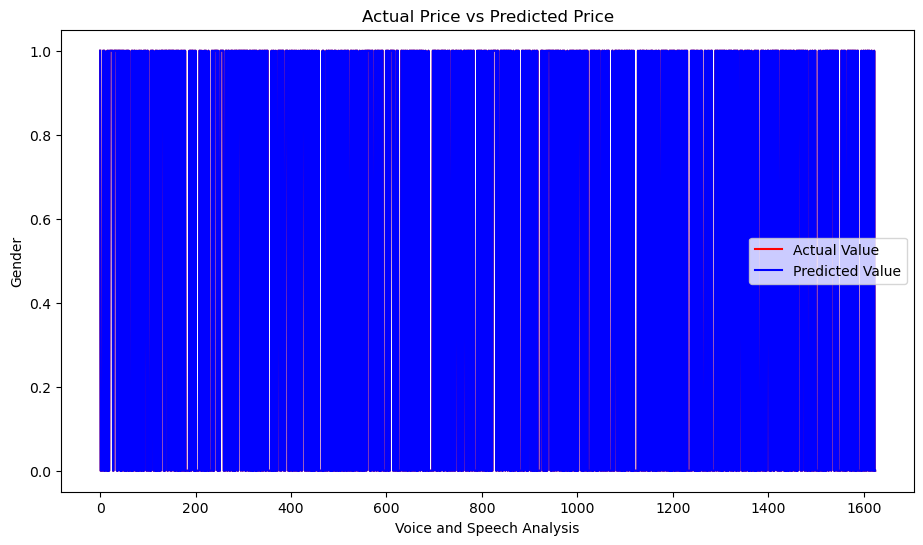

In [22]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.show()

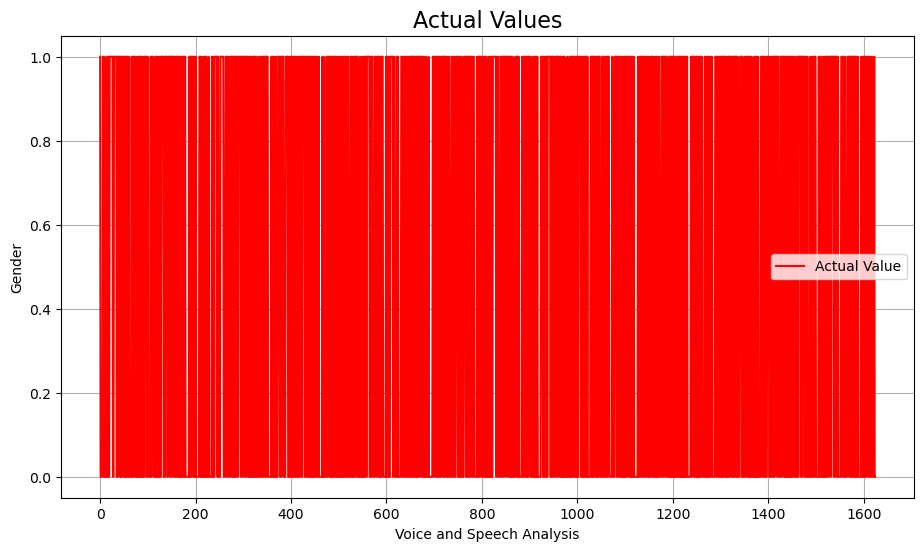

In [23]:
# Plot for Actual Values
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.title('Actual Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

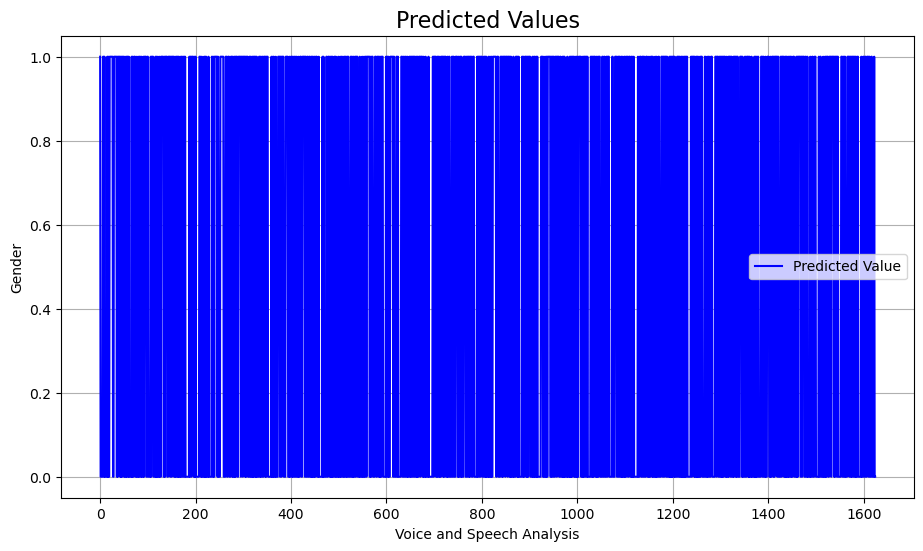

In [24]:
# Plot for Predicted Values
plt.figure(figsize=(11, 6))
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Predicted Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

### Creation of Decision Tree 

[Text(0.5769230769230769, 0.9285714285714286, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3356, 3143]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[20] <= 0.5\nentropy = 0.657\nsamples = 3664\nvalue = [622, 3042]'),
 Text(0.3076923076923077, 0.6428571428571429, 'x[53] <= 0.5\nentropy = 0.978\nsamples = 1060\nvalue = [622, 438]'),
 Text(0.23076923076923078, 0.5, 'x[63] <= 0.5\nentropy = 0.927\nsamples = 666\nvalue = [228, 438]'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[110] <= 0.5\nentropy = 0.587\nsamples = 510\nvalue = [72, 438]'),
 Text(0.07692307692307693, 0.21428571428571427, 'entropy = 0.0\nsamples = 438\nvalue = [0, 438]'),
 Text(0.23076923076923078, 0.21428571428571427, 'entropy = 0.0\nsamples = 72\nvalue = [72, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 156\nvalue = [156, 0]'),
 Text(0.38461538461538464, 0.5, 'entropy = 0.0\nsamples = 394\nvalue = [394, 0]'),
 Text(0.46153846153846156, 0.6428571428571429, 'entro

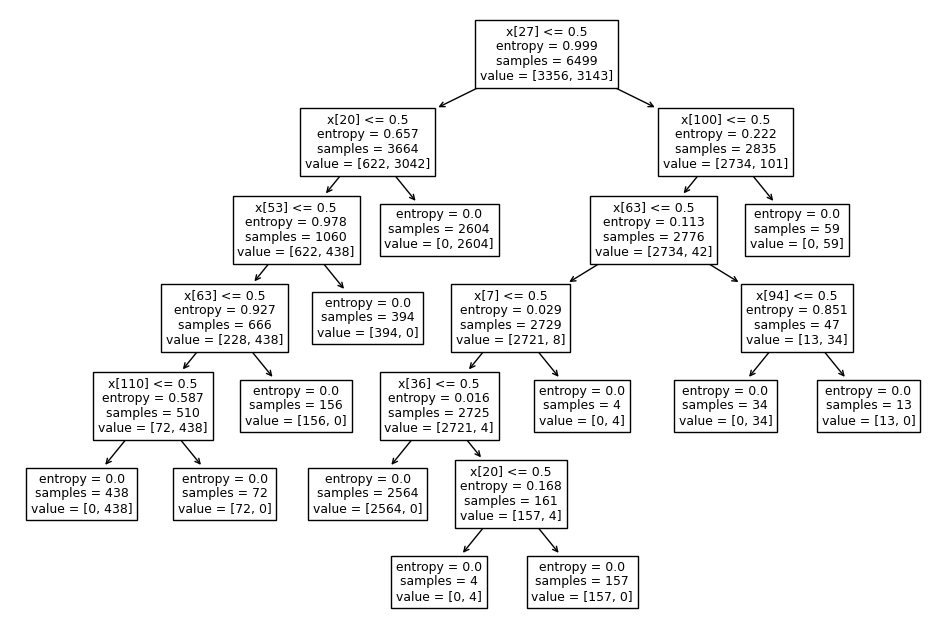

In [30]:
from sklearn import tree
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(classifier.fit(x_train, y_train)) 

## Step 10: <span id="10" style="color: #4A628A">model evaluation ⚡ </span>[🔝](#top)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.0
mean_absolute_error :  0.0


## Step 11: <span id="11" style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

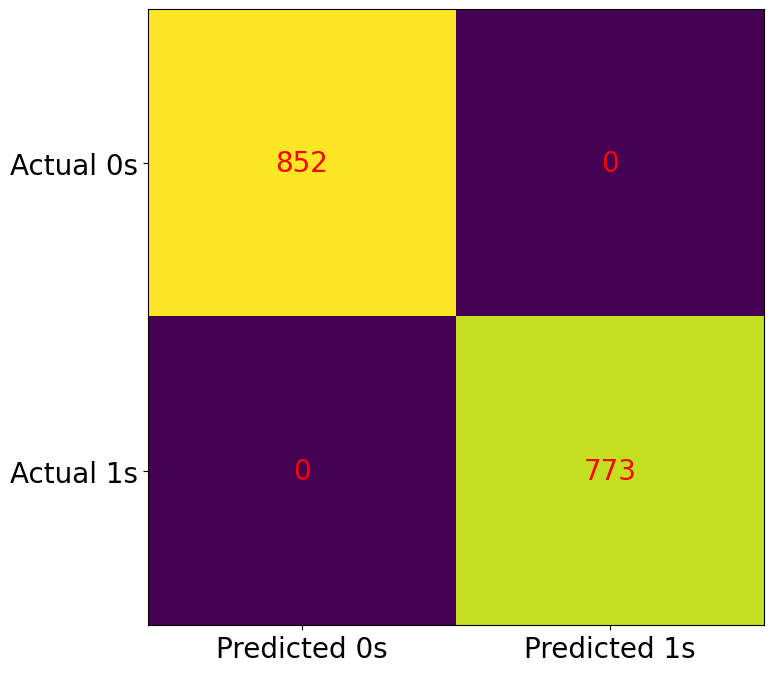

In [26]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

## Step 12: <span id="12" style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [27]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

1.0


## <a id="12">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- kaggle : https://www.kaggle.com/datasets/uciml/mushroom-classification
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20